<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# Liga Data Science
## Prof. Eduardo Pécora

# Regressão Linear Múltipla e XGBOOST
## Incluindo as variáveis categóricas
Tempo estimado: **15** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Utilizar as variáves categóricas pana regressão.
* Comparar os resultados de dois modelos diferentes.


## Bibliotecas

In [69]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Importando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBRegressor

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Coleta & Preparação dos dados

In [70]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpoPP.csv"

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)
df.head()

,symboling,make,body-style,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,convertible,48.8,2548,111.0,5000.0,21,27,13495
1,3,alfa-romero,convertible,48.8,2548,111.0,5000.0,21,27,16500
2,1,alfa-romero,hatchback,52.4,2823,154.0,5000.0,19,26,16500
3,2,audi,sedan,54.3,2337,102.0,5500.0,24,30,13950
4,2,audi,sedan,54.3,2824,115.0,5500.0,18,22,17450


## Uniformizando a coluna `make`

In [71]:
# Tratar as colunas não numéricas

print(df['make'].unique())
df['make'] = df['make'].replace({'BMW': 'bmw'})

print(df['make'].unique())

['alfa-romero' 'audi' 'bmw' 'BMW' 'chevrolet' 'dodge' 'doge' 'honda'
 'isuzu' 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan'
 'peugot' 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota'
 'volkswagen' 'VW' 'volv1' 'volvo']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'doge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'VW'
 'volv1' 'volvo']


In [72]:
df['make'] = df['make'].replace({'doge': 'dodge', 'VW':'volkswagen', 'volv1':'volvo' })

print(df['make'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [73]:
# Crie uma instância do codificador OneHotEncoder
encoder = OneHotEncoder()

# Ajuste e transforme os dados da coluna "make"
dummy_array = encoder.fit_transform(df[['make']])

# Crie um DataFrame Pandas com as variáveis dummy
dummy_df = pd.DataFrame(dummy_array.toarray(), columns=encoder.get_feature_names_out(['make']))

# Concatene o DataFrame dummy com os outros dados
df = pd.concat([df.drop('make', axis=1), dummy_df], axis=1)

df.head()

,symboling,body-style,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,convertible,48.8,2548,111.0,5000.0,21,27,13495,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,convertible,48.8,2548,111.0,5000.0,21,27,16500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,hatchback,52.4,2823,154.0,5000.0,19,26,16500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,sedan,54.3,2337,102.0,5500.0,24,30,13950,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,sedan,54.3,2824,115.0,5500.0,18,22,17450,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Mesmo tratamento pata a coluna `body-style`

In [74]:
print(df['body-style'].unique())
# Ajuste e transforme os dados da coluna "make"
dummy_array = encoder.fit_transform(df[['body-style']])

# Crie um DataFrame Pandas com as variáveis dummy
dummy_df = pd.DataFrame(dummy_array.toarray(), columns=encoder.get_feature_names_out(['body-style']))

# Concatene o DataFrame dummy com os outros dados
df = pd.concat([df.drop('body-style', axis=1), dummy_df], axis=1)

df.head()

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


,symboling,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,48.8,2548,111.0,5000.0,21,27,13495,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,48.8,2548,111.0,5000.0,21,27,16500,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,52.4,2823,154.0,5000.0,19,26,16500,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,54.3,2337,102.0,5500.0,24,30,13950,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,54.3,2824,115.0,5500.0,18,22,17450,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
#Variáveis Independentes
X = df.drop(columns=['price'])

#Variável Dependente
y = df['price']  # Target variable

# Separar em dados de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelagem e Avaliação

### Regressão Linear

In [76]:
# Inicializar o Modelo
linear_model = LinearRegression()

# Treinar o Modelo Linear
linear_model.fit(X_train, y_train)

# Fazer as Predições
y_hat_linear = linear_model.predict(X_test)

# Avaliar o modelo de regressão
mse_linear = mean_squared_error(y_test, y_hat_linear)
rmse_linear = np.sqrt(mse_linear)
R2 = linear_model.score(X_test, y_test)

print(f"Regressão Linear \nRoot Mean Squared Error (RMSE): {rmse_linear}")
print(f"R2: {R2}")

Regressão Linear 
Root Mean Squared Error (RMSE): 3441.6435589411094
R2: 0.9031857556325138


### XGBoost

In [77]:
# Inicializar o modelo XGBoost
XGmodel = XGBRegressor(objective='reg:squarederror', random_state=42)  # Use appropriate objective function for regression
XGmodel.fit(X_train, y_train)

# Fazer as Predições
y_hat_xgBoost = XGmodel.predict(X_test)

# Avaliar o modelo de XGBOOST
mse_xg = mean_squared_error(y_test, y_hat_xgBoost)
rmse_xg = np.sqrt(mse_xg)
R2 = XGmodel.score(X_test, y_test)

print(f"Regressão Linear \nRoot Mean Squared Error (RMSE): {rmse_xg}")
print(f"R2: {R2}")

Regressão Linear 
Root Mean Squared Error (RMSE): 4354.263657611928
R2: 0.8450338244438171


## Aprofundando a Avaliação

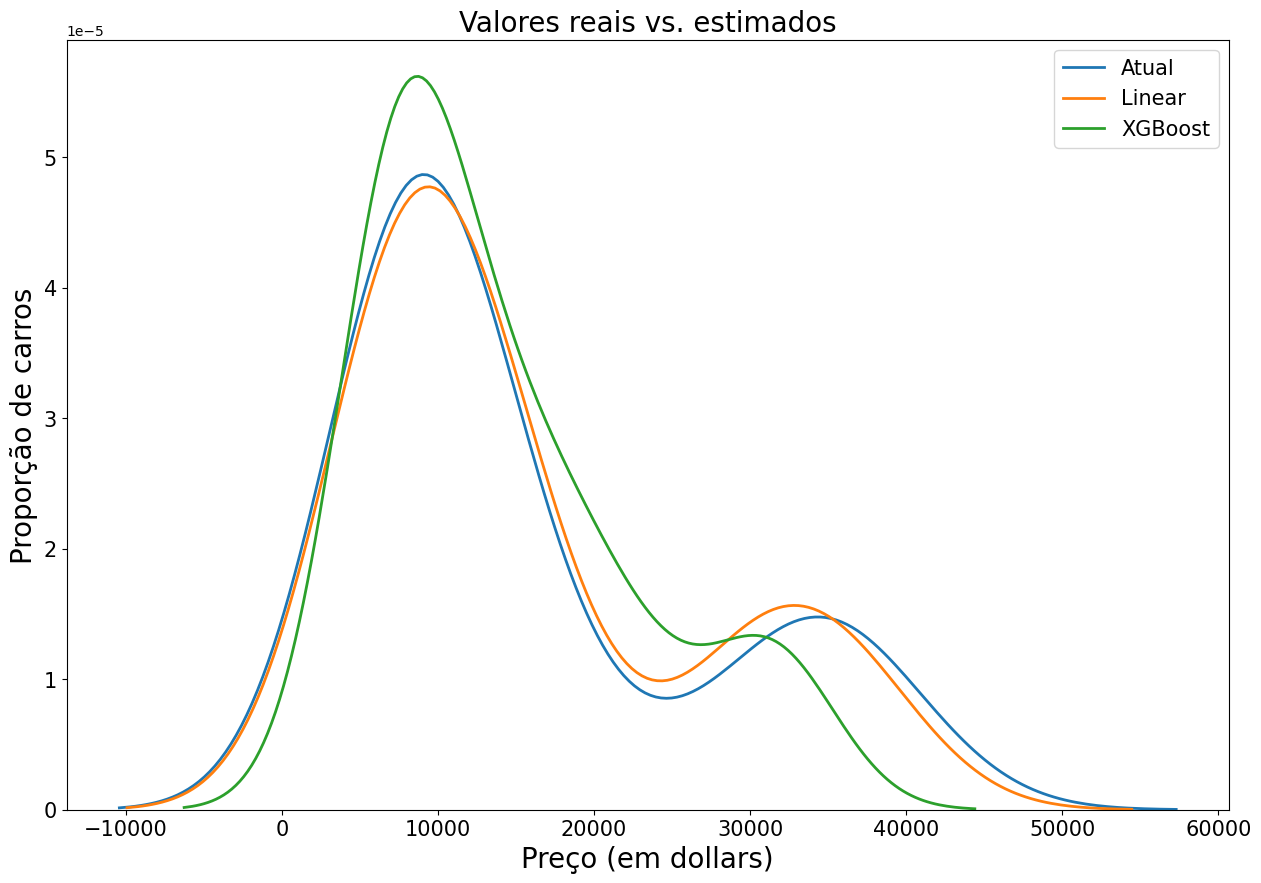

In [78]:
df_resultado = pd.DataFrame({'Atual': y_test, 'Linear': y_hat_linear,'XGBoost': y_hat_xgBoost})

plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_resultado['Atual'], label = 'Atual', linewidth = 2)
sns.kdeplot(data = df_resultado['Linear'], label = 'Linear', linewidth = 2)
sns.kdeplot(data = df_resultado['XGBoost'], label = 'XGBoost', linewidth = 2)

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=['Atual',"Linear",'XGBoost'], fontsize = 15, bbox_to_anchor=(1, 1))

## Fique Conectado

- [![YouTube](https://img.icons8.com/?size=40&id=19318&format=png&color=000000)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/?size=40&id=13930&format=png&color=000000)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/?size=40&id=32323&format=png&color=000000)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a> , <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

Traduzido e inspirado do material desenvolviedo pela IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>
* Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>
* Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |
| 18-09-2024       | 1.4     | João Gabriel      | Atualização           |
| 12-02-2025       | 1.4.1   | Eduardo Pecora      | Metodologia           |